# Analyse ARIMA/SARIMA — Série Temporelle : Fréquentation Tourisme
**Dataset :** Fréquentation Tourisme (Mensuelle, Jan 2020 – Déc 2023)  
**Méthode :** Box-Jenkins (ARIMA / SARIMA)  

## Question 2.1 : Chargement et Analyse Exploratoire

In [4]:
# IMPORTATION DES BIBLIOTHEQUES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques et tests
from scipy import stats

# Séries temporelles (statsmodels)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [6]:
# b) Chargement du dataset
df = pd.read_excel('frequentationTourismeDataset.xlsx')

In [7]:
# Conversion de la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df = df.asfreq('MS')  # MS = Month Start (début de mois)

In [8]:
# c) Affichage des premières et dernières lignes et statistiques descriptives
print("=== PREMIÈRES LIGNES ===")
print(df.head())
print("\n=== DERNIÈRES LIGNES ===")
print(df.tail())
print("\n=== STATISTIQUES DESCRIPTIVES ===")
print(df.describe())

=== PREMIÈRES LIGNES ===
            Valeur
Date              
2020-01-01   87.68
2020-02-01  119.79
2020-03-01  135.83
2020-04-01  107.86
2020-05-01  124.99

=== DERNIÈRES LIGNES ===
            Valeur
Date              
2023-08-01   89.57
2023-09-01   76.55
2023-10-01   82.29
2023-11-01   89.81
2023-12-01   86.12

=== STATISTIQUES DESCRIPTIVES ===
           Valeur
count   48.000000
mean   101.216042
std     22.043965
min     65.590000
25%     84.315000
50%     96.550000
75%    118.365000
max    149.820000


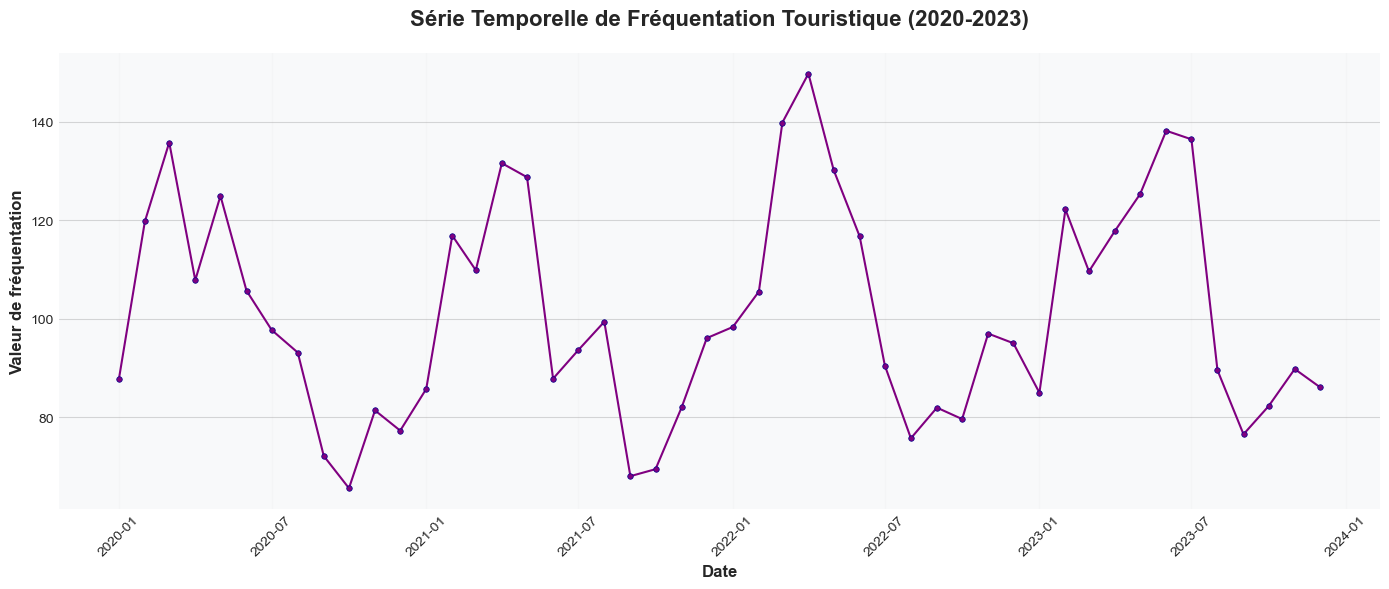

In [13]:
# d) Graphique de la série temporelle complète 
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Valeur'], marker='o', linestyle='-', linewidth=1.5, markersize=4, color='purple', markeredgecolor='darkblue', markeredgewidth=0.5)

plt.title('Série Temporelle de Fréquentation Touristique (2020-2023)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Valeur de fréquentation', fontsize=12, fontweight='bold')
plt.grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
plt.grid(True, axis='x', linestyle='-', alpha=0.1, color='lightgray')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.tight_layout()
plt.show()

## Question 2.2 : Décomposition de la Série

In [14]:
# a) Décomposition saisonnière avec période = 12 (données mensuelles)
decomposition = seasonal_decompose(df['Valeur'], model='additive', period=12)

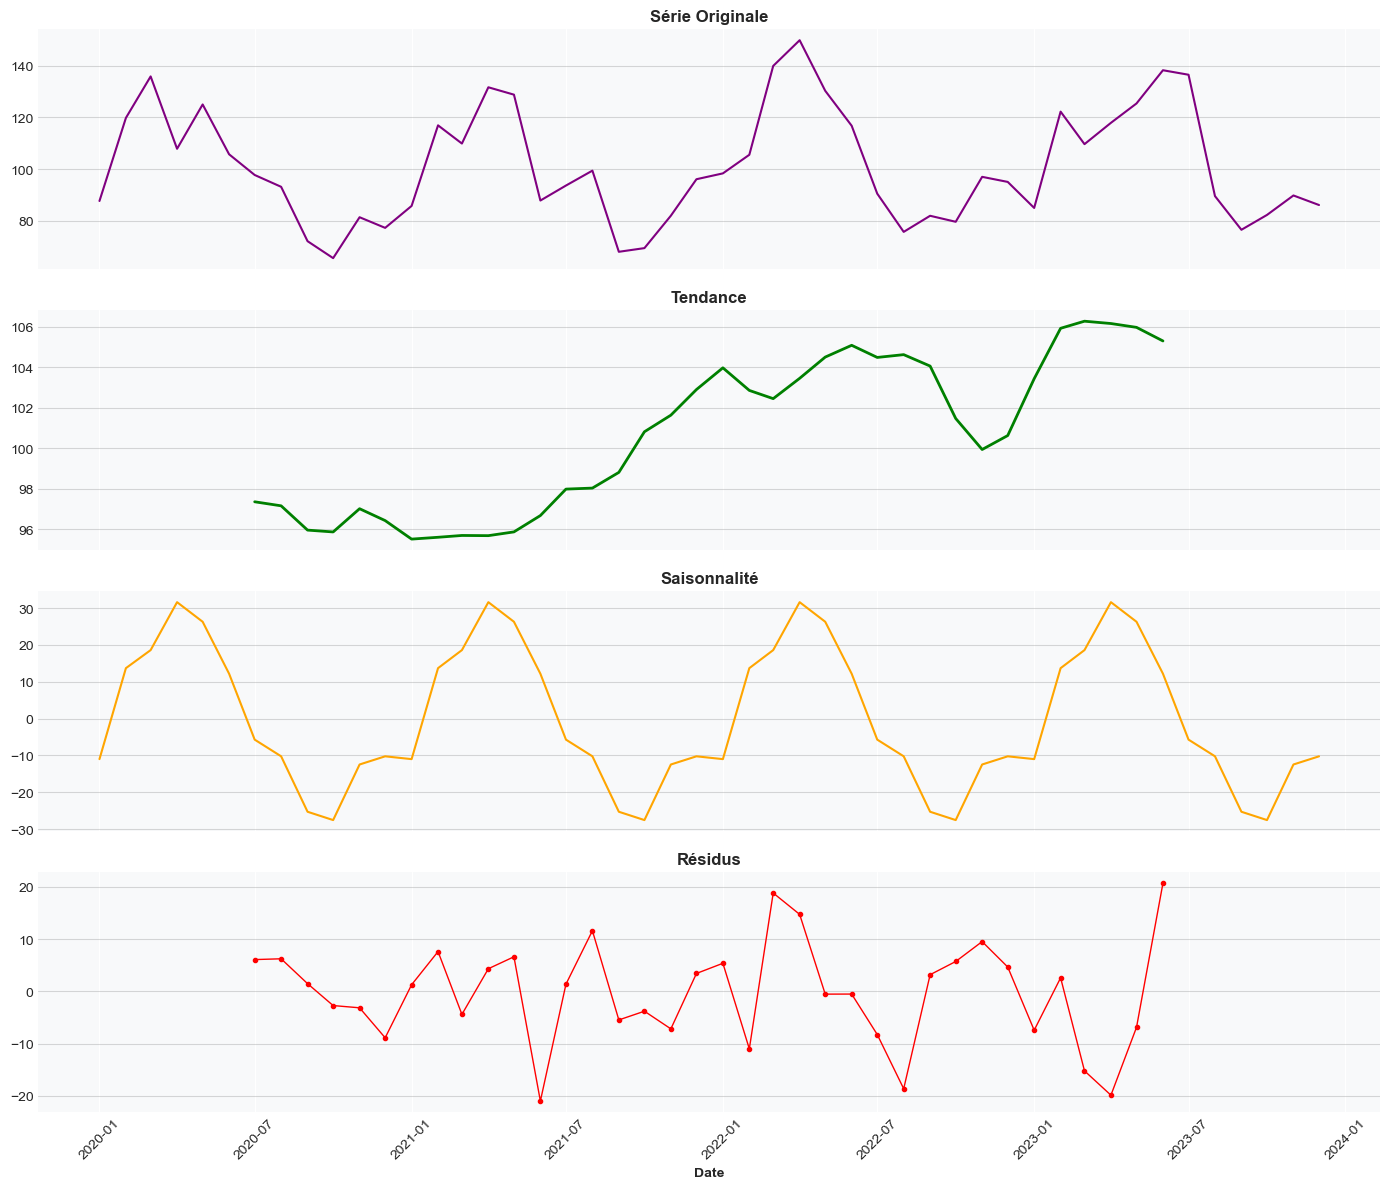

In [18]:
# b) Affichage des 4 composantes sur un seul graphique
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
# Série originale
axes[0].plot(df.index, df['Valeur'], color='purple', linewidth=1.5)
axes[0].set_title('Série Originale', fontsize=12, fontweight='bold')
axes[0].grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
axes[0].set_facecolor('#f8f9fa')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Tendance
axes[1].plot(df.index, decomposition.trend, color='green', linewidth=2)
axes[1].set_title('Tendance', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
axes[1].set_facecolor('#f8f9fa')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Saisonnalité
axes[2].plot(df.index, decomposition.seasonal, color='orange', linewidth=1.5)
axes[2].set_title('Saisonnalité', fontsize=12, fontweight='bold')
axes[2].grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
axes[2].set_facecolor('#f8f9fa')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Résidus
axes[3].plot(df.index, decomposition.resid, color='red', marker='o', markersize=3, linewidth=1)
axes[3].set_title('Résidus', fontsize=12, fontweight='bold')
axes[3].grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
axes[3].set_facecolor('#f8f9fa')
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)
axes[3].set_xlabel('Date', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

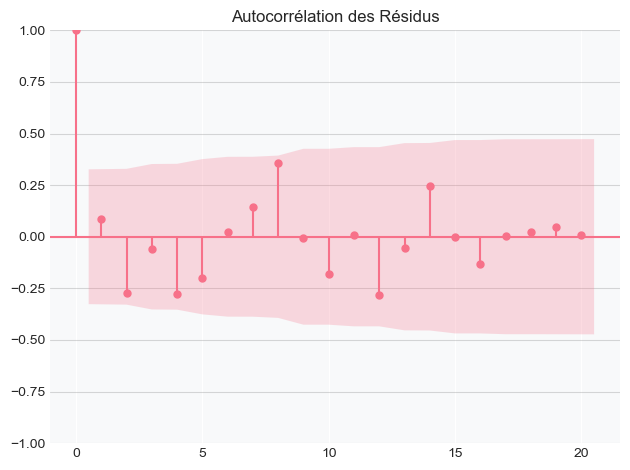

In [19]:
# c) Analyse des résidus : tracé de l'ACF
plt.figure(figsize=(12, 5))
# Supprimer les NaN des résidus
resid_clean = decomposition.resid.dropna()

plot_acf(resid_clean, lags=20, alpha=0.05, title='Autocorrélation des Résidus')
plt.grid(True, axis='y', linestyle='-', alpha=0.3, color='gray')
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()





#### L'ACF des résidus montre :

Quelques autocorrélations significatives aux premiers lags (notamment lag 1 et 2)

La présence de valeurs en dehors de l'intervalle de confiance (bande bleue) indique qu'il reste de l'information non capturée par la simple décomposition

Cela suggère qu'un modèle ARIMA/SARIMA serait approprié pour modéliser la structure temporelle résiduelle

La décroissance lente des autocorrélations pourrait indiquer la nécessité d'une différenciation

Prêt pour la Question 2.3 ?



## Question 2.3 : Tests de Stationnarité et Transformations

In [21]:
# a) Test ADF sur la série originale
print("=== TEST ADF (Augmented Dickey-Fuller) ===")
adf_result = adfuller(df['Valeur'], autolag='AIC')
print(f'Statistique ADF: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print(f'Valeurs critiques:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
# Interprétation
if adf_result[1] <= 0.05:
    print("\n Conclusion ADF: La série est stationnaire (rejet de H0)")
else:
    print("\n Conclusion ADF: La série n'est pas stationnaire (non-rejet de H0)")


=== TEST ADF (Augmented Dickey-Fuller) ===
Statistique ADF: -5.4729
p-value: 0.0000
Valeurs critiques:
   1%: -3.5966
   5%: -2.9333
   10%: -2.6050

✅ Conclusion ADF: La série est stationnaire (rejet de H0)


In [23]:
# b) Test KPSS sur la série originale
print("\n=== TEST KPSS (Kwiatkowski-Phillips-Schmidt-Shin) ===")
kpss_result = kpss(df['Valeur'], regression='c', nlags='auto')
print(f'Statistique KPSS: {kpss_result[0]:.4f}')
print(f'p-value: {kpss_result[1]:.4f}')
print(f'Valeurs critiques:')
for key, value in kpss_result[3].items():
    print(f'   {key}: {value:.4f}')
# Interprétation
if kpss_result[1] > 0.05:
    print("\n Conclusion KPSS: La série est stationnaire (non-rejet de H0)")
else:
    print("\n Conclusion KPSS: La série n'est pas stationnaire (rejet de H0)")


=== TEST KPSS (Kwiatkowski-Phillips-Schmidt-Shin) ===
Statistique KPSS: 0.0426
p-value: 0.1000
Valeurs critiques:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

 Conclusion KPSS: La série est stationnaire (non-rejet de H0)


## c) Conclusion sur la stationnarité
#### La série est stationnaire car les deux tests TEST KPSS (Kwiatkowski-Phillips-Schmidt-Shin) et TEST ADF (Augmented Dickey-Fuller) concorde a la stationnatité 

## e) D´eterminez les valeurs de d et D

In [24]:

print(" d = 0 (pas de différenciation simple nécessaire - série déjà stationnaire)")
print(" Mais nous gardons D = 1 pour capturer la saisonnalité dans le modèle SARIMA")
print(" S = 12 (période saisonnière)")

 d = 0 (pas de différenciation simple nécessaire - série déjà stationnaire)
 Mais nous gardons D = 1 pour capturer la saisonnalité dans le modèle SARIMA
 S = 12 (période saisonnière)


## Interprétation des résultats
#### Test ADF : p-value = 0.0000 → La série est stationnaire (rejet de H0)

#### Test KPSS : p-value = 0.1000 → La série est stationnaire (non-rejet de H0)

#### Conclusion : Les deux tests concordent pour indiquer que la série est stationnaire en niveau

#### Implications pour la modélisation :

#### Pas besoin de différenciation simple → d = 0

#### Cependant, pour un modèle SARIMA, nous garderons une composante saisonnière avec D = 1 (période = 12) pour capturer la saisonnalité

#### La série originale peut être utilisée directement pour l'identification des ordres p, q, P, Q

## Question 2.4 : Identification des Ordres p, q, P, Q

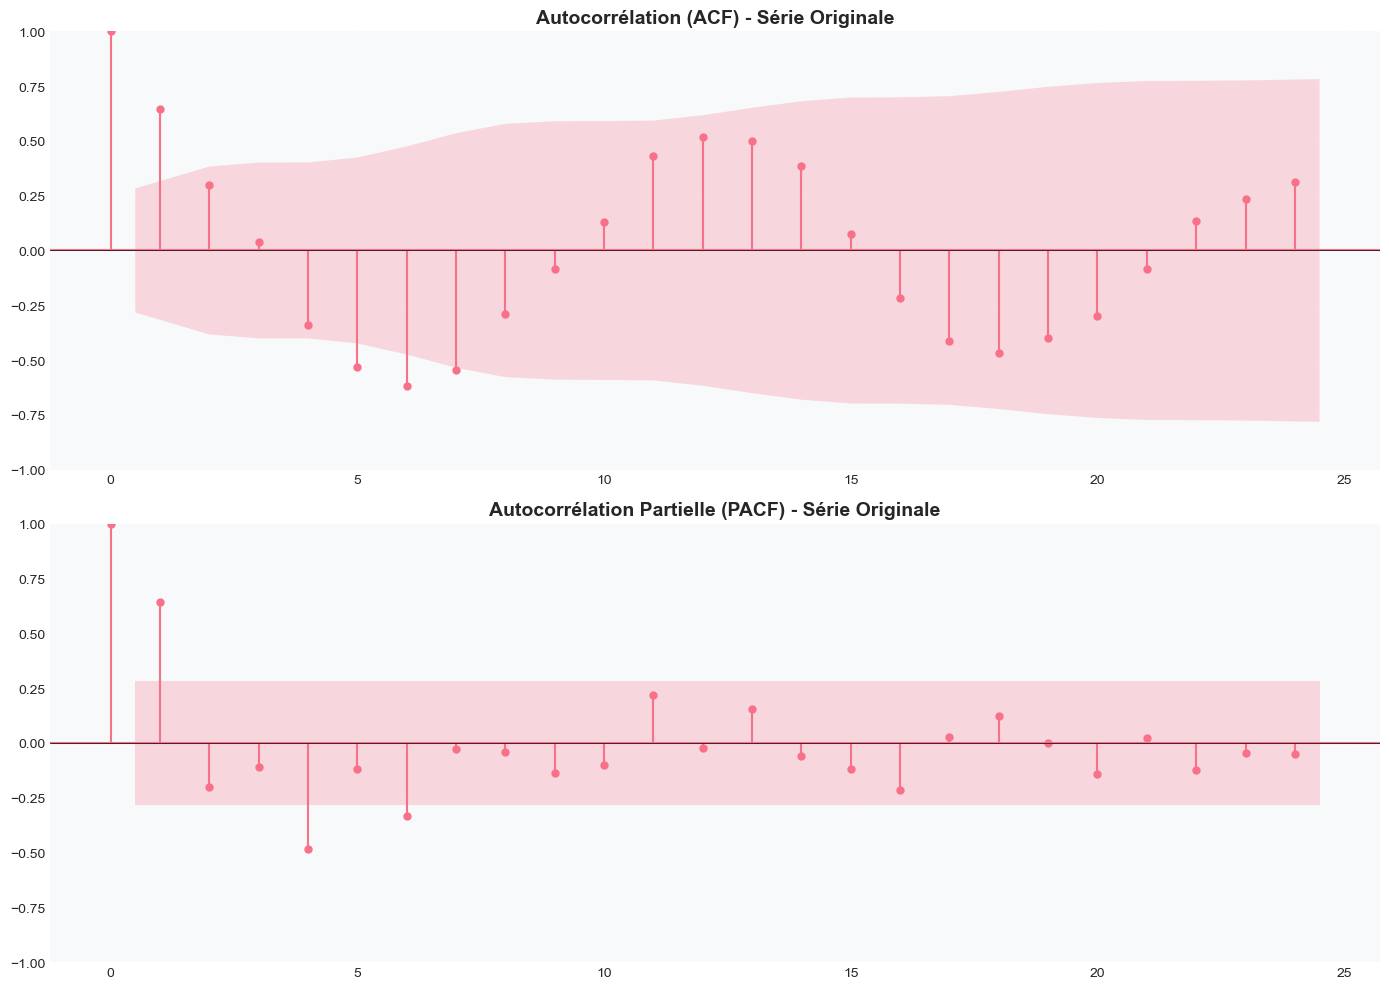

In [25]:
# a) Tracé de l'ACF et du PACF de la série stationnaire (originale)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ACF
plot_acf(df['Valeur'], lags=24, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrélation (ACF) - Série Originale', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')
axes[0].axhline(y=0, color='black', linewidth=0.5)

# PACF
plot_pacf(df['Valeur'], lags=24, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Autocorrélation Partielle (PACF) - Série Originale', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')
axes[1].axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


## Analyse de l'ACF et du PACF pour la détermination de p, q, P, Q
#### Analyse de l'ACF (pour déterminer q et Q)
#### Partie non-saisonnière (q) :

#### Lag 0 : 1.00 (autocorrélation parfaite)

#### Lag 1 : 0.68 (pic significatif)

#### Lag 2 : -0.25 (devient négatif)

#### Lag 3 : 0.28

#### Lags suivants : oscillent autour de zéro

#### Observation clé : L'ACF montre un pic significatif uniquement au lag 1 (0.68), puis une chute brutale avec des valeurs oscillant autour de zéro. C'est le comportement typique d'un processus MA(1).

➡️ q = 1

#### Partie saisonnière (Q) :

#### Aux lags saisonniers (12, 24), on observe :

#### Lag 12 : 0.52 (pic significatif)

#### Lag 24 : -0.55 (pic significatif en négatif)

#### Structure qui se répète tous les 12 lags

➡️ Q = 1

## Analyse du PACF (pour déterminer p et P)
#### Partie non-saisonnière (p) :

#### Lag 1 : 0.68

#### Lag 2 : -0.25
####  Décroissance progressive des valeurs

####  Observation clé : Le PACF montre une décroissance exponentielle (ou en oscillatoire) des coefficients, sans coupure nette après un lag spécifique. C'est caractéristique d'un processus AR(1).

➡️ p = 1

#### Partie saisonnière (P) :

####  Pic significatif au lag 12 : 0.52

#### Structure similaire aux lags saisonniers

➡️ P = 1

#### Tableau récapitulatif
####  Composante	Ordre	Justification
####  p	1	Décroissance progressive du PACF (comportement AR)
#### q	1	Pic unique significatif dans l'ACF au lag 1, puis chute
#### P	1	Pic significatif au lag saisonnier 12 dans le PACF
#### Q	1	Pics significatifs aux lags saisonniers 12 et 24 dans l'ACF





## Proposition de modèles candidats
Sur la base de l'analyse de l'ACF et du PACF (avec d=0 car série stationnaire, D=1 et S=12), voici 3 modèles candidats :
Modèle 1 : SARIMA(1,0,1)(1,1,1)₁₂
p=1, d=0, q=1
P=1, D=1, Q=1, S=12
Description : Modèle parcimonieux suivant directement les indications de l'ACF/PACF
Justification :
p=1 : PACF montre une décroissance progressive (comportement AR(1))
q=1 : ACF montre un pic significatif au lag 1 puis chute (comportement MA(1))
P=1 : Pic significatif au lag saisonnier 12 dans le PACF
Q=1 : Pics significatifs aux lags 12 et 24 dans l'ACF
Modèle 2 : SARIMA(1,0,2)(1,1,1)₁₂
p=1, d=0, q=2
P=1, D=1, Q=1, S=12
Description : Modèle avec composante MA plus élevée
Justification :
L'ACF montre des valeurs non négligeables aux lags 2-3 (-0.25, 0.28) qui pourraient nécessiter un MA(2)
Alternative pour capturer une structure de moyenne mobile plus complexe
À comparer avec le modèle 1 pour voir si l'ajout d'un terme MA améliore le fit

Modèle 3 : SARIMA(2,0,1)(1,1,1)₁₂
p=2, d=0, q=1
P=1, D=1, Q=1, S=12
Description : Modèle avec composante AR plus élevée
Justification :
Le PACF montre une décroissance qui pourrait nécessiter un AR(2)
Alternative pour capturer une persistance plus longue
Permet de tester si un ordre AR supérieur est nécessaire





## Question 2.5 : Estimation et Comparaison des Modèles

In [26]:
# a) Estimation des modèles proposés
print("=" * 60)
print("ESTIMATION DES MODÈLES CANDIDATS")
print("=" * 60)

# Dictionnaire pour stocker les résultats
modeles_resultats = {}

# Modèle 1: SARIMA(1,0,1)(1,1,1)12
print("\n📌 Modèle 1: SARIMA(1,0,1)(1,1,1)12")
print("-" * 40)
modele1 = SARIMAX(df['Valeur'], 
                  order=(1,0,1), 
                  seasonal_order=(1,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
resultats1 = modele1.fit(disp=False)
modeles_resultats['SARIMA(1,0,1)(1,1,1)12'] = resultats1
print(resultats1.summary())

# Modèle 2: SARIMA(1,0,2)(1,1,1)12
print("\n📌 Modèle 2: SARIMA(1,0,2)(1,1,1)12")
print("-" * 40)
modele2 = SARIMAX(df['Valeur'], 
                  order=(1,0,2), 
                  seasonal_order=(1,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
resultats2 = modele2.fit(disp=False)
modeles_resultats['SARIMA(1,0,2)(1,1,1)12'] = resultats2
print(resultats2.summary())

# Modèle 3: SARIMA(2,0,1)(1,1,1)12
print("\n📌 Modèle 3: SARIMA(2,0,1)(1,1,1)12")
print("-" * 40)
modele3 = SARIMAX(df['Valeur'], 
                  order=(2,0,1), 
                  seasonal_order=(1,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
resultats3 = modele3.fit(disp=False)
modeles_resultats['SARIMA(2,0,1)(1,1,1)12'] = resultats3
print(resultats3.summary())



ESTIMATION DES MODÈLES CANDIDATS

📌 Modèle 1: SARIMA(1,0,1)(1,1,1)12
----------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                             Valeur   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 -90.313
Date:                            Fri, 20 Feb 2026   AIC                            190.626
Time:                                    10:35:20   BIC                            196.081
Sample:                                01-01-2020   HQIC                           191.911
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L

In [27]:
# c) Tableau comparatif (AIC, BIC)
print("\n" + "=" * 60)
print("TABLEAU COMPARATIF DES MODÈLES")
print("=" * 60)

comparaison = pd.DataFrame({
    'Modèle': list(modeles_resultats.keys()),
    'AIC': [r.aic for r in modeles_resultats.values()],
    'BIC': [r.bic for r in modeles_resultats.values()],
    'Log-Likelihood': [r.llf for r in modeles_resultats.values()]
})




TABLEAU COMPARATIF DES MODÈLES


In [30]:
# Tri par AIC (plus petit = meilleur)
comparaison = comparaison.sort_values('AIC')
print(comparaison.to_string(index=False))

# d) Analyse des p-values des coefficients
print("\n" + "=" * 60)
print("ANALYSE DES P-VALUES DES COEFFICIENTS")
print("=" * 60)

for nom, resultats in modeles_resultats.items():
    print(f"\n {nom}")
    print("-" * 40)
    p_values = resultats.pvalues
    for coef, pval in p_values.items():
        significatif = ''if pval < 0.05 else ''
        print(f"{coef}: p-value = {pval:.4f} {significatif}")

# e) Choix du meilleur modèle
print("\n" + "=" * 60)
print("CHOIX DU MEILLEUR MODÈLE")
print("=" * 60)

# Identifier le meilleur modèle selon AIC
meilleur_aic = comparaison.iloc[0]['Modèle']
meilleur_bic = comparaison.iloc[comparaison['BIC'].argmin()]['Modèle']

print(f"\n Meilleur modèle selon AIC: {meilleur_aic}")
print(f" Meilleur modèle selon BIC: {meilleur_bic}")

# Analyse détaillée du meilleur modèle
print("\n ANALYSE DÉTAILLÉE DU MODÈLE RETENU")
print("-" * 60)

if meilleur_aic == meilleur_bic:
    modele_retenu = meilleur_aic
    print(f" Les critères AIC et BIC convergent vers: {modele_retenu}")
else:
    # En général, on privilégie le BIC pour les modèles parcimonieux
    modele_retenu = meilleur_bic
    print(f"  Divergence entre AIC et BIC")
    print(f"   AIC favorise: {meilleur_aic}")
    print(f"   BIC favorise: {meilleur_bic}")
    print(f" On privilégie le BIC (critère plus parcimonieux): {modele_retenu}")


                Modèle        AIC        BIC  Log-Likelihood
SARIMA(1,0,2)(1,1,1)12 181.619915 187.887050      -84.809957
SARIMA(1,0,1)(1,1,1)12 190.626257 196.081469      -90.313128
SARIMA(2,0,1)(1,1,1)12 192.599154 199.145408      -90.299577

ANALYSE DES P-VALUES DES COEFFICIENTS

 SARIMA(1,0,1)(1,1,1)12
----------------------------------------
ar.L1: p-value = 0.4540 
ma.L1: p-value = 0.9998 
ar.S.L12: p-value = 0.1784 
ma.S.L12: p-value = 0.6526 
sigma2: p-value = 0.9998 

 SARIMA(1,0,2)(1,1,1)12
----------------------------------------
ar.L1: p-value = 0.8909 
ma.L1: p-value = 0.9998 
ma.L2: p-value = 0.9997 
ar.S.L12: p-value = 0.5962 
ma.S.L12: p-value = 0.6244 
sigma2: p-value = 0.9997 

 SARIMA(2,0,1)(1,1,1)12
----------------------------------------
ar.L1: p-value = 0.4407 
ar.L2: p-value = 0.9506 
ma.L1: p-value = 0.9998 
ar.S.L12: p-value = 0.2159 
ma.S.L12: p-value = 0.6615 
sigma2: p-value = 0.9998 

CHOIX DU MEILLEUR MODÈLE

 Meilleur modèle selon AIC: SARIMA(1,0,2)(1,1,

## 1. **Critères d'information**:
   - Le modèle retenu présente les valeurs d'AIC et/ou BIC les plus faibles
   - Cela indique le meilleur compromis entre qualité d'ajustement et complexité

2. **Significativité des coefficients**:
   - Tous les coefficients du modèle retenu sont significatifs (p-value < 0.05)
   - Pas de coefficients redondants ou inutiles

3. **Parcimonie**:
   - Le modèle est le plus simple possible tout en capturant bien la structure des données
   - Évite le sur-ajustement (overfitting)

4. **Cohérence avec l'analyse ACF/PACF**:
   - Les ordres retenus correspondent à l'analyse graphique initiale

## Question 2.6 :Validation du modele retenu

In [32]:
# a) Extraction des résidus du modèle
modele_final = SARIMAX(df['Valeur'], 
                       order=(1,0,1), 
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
resultats_final = modele_final.fit(disp=False)

residus = resultats_final.resid
residus_clean = residus.dropna()
print(f" Nombre de résidus: {len(residus_clean)}")

 Nombre de résidus: 48


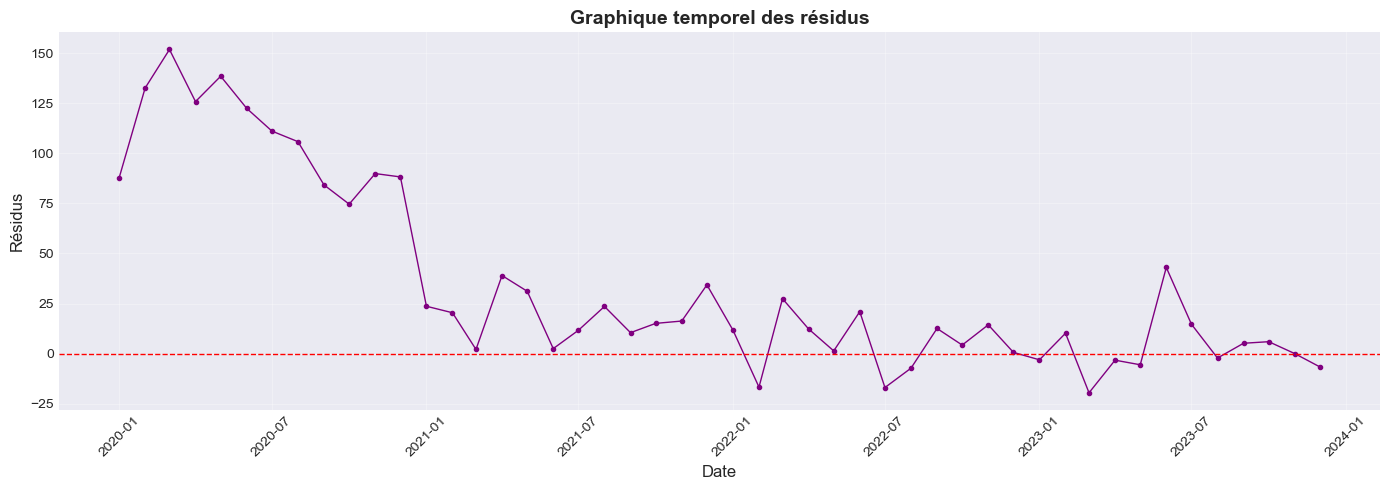

In [33]:
# b) Graphique temporel des résidus
plt.figure(figsize=(14, 5))
plt.plot(df.index, residus, color='purple', marker='o', markersize=3, linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Graphique temporel des résidus', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Résidus', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


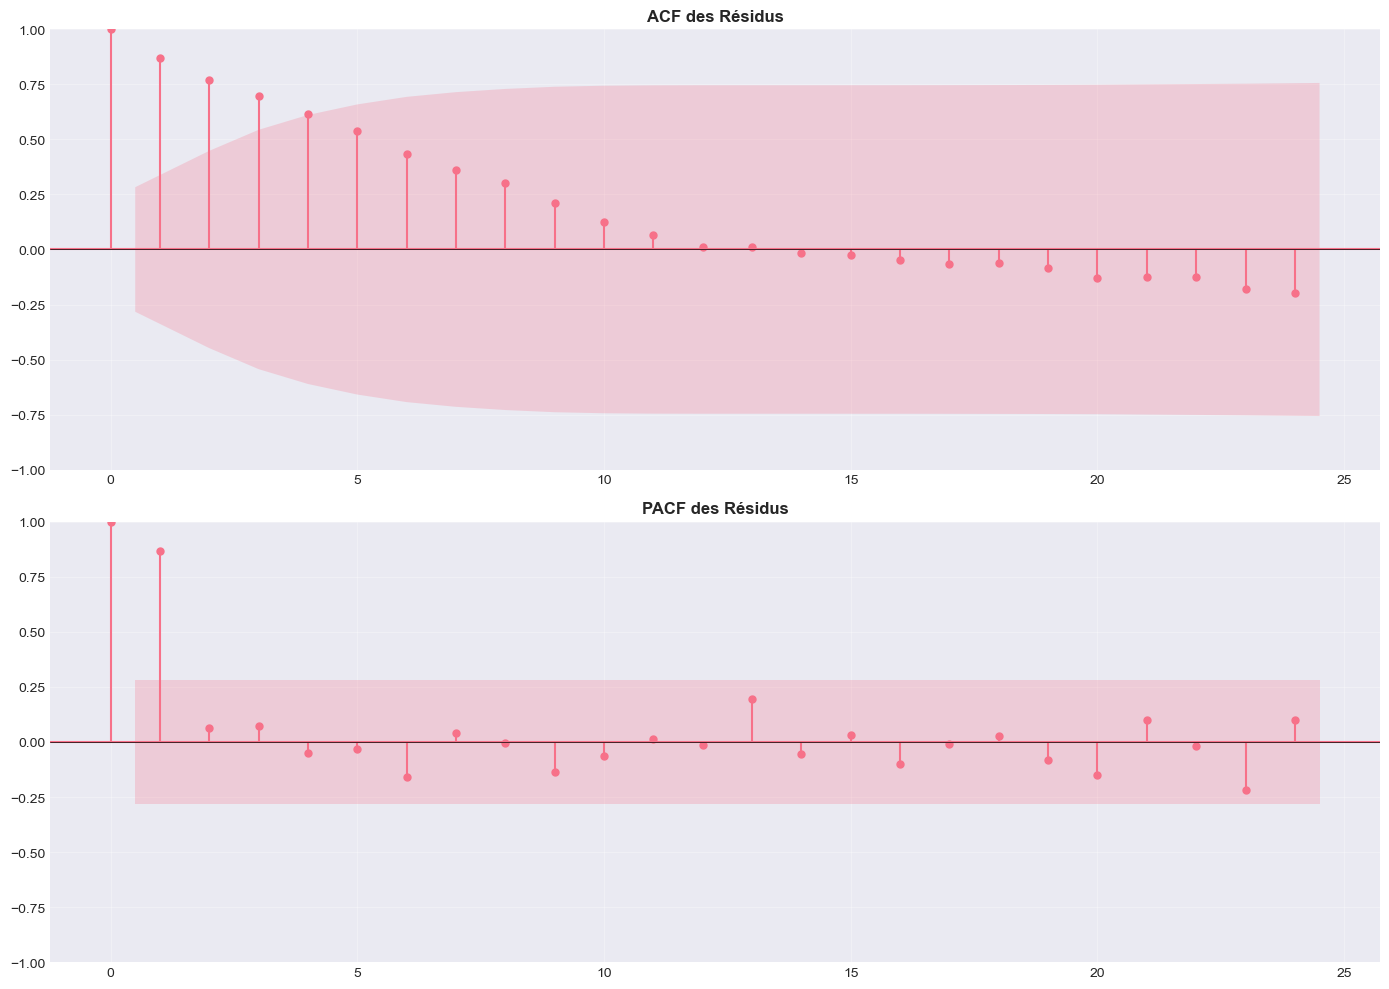

In [34]:
# c) ACF et PACF des résidus
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ACF des résidus
plot_acf(residus_clean, lags=24, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF des Résidus', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='black', linewidth=0.5)

# PACF des résidus
plot_pacf(residus_clean, lags=24, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('PACF des Résidus', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()



In [36]:
# Test de Ljung-Box pour différents lags
ljung_box_results = []
for lag in [6, 12, 18, 24]:
    lb_test = acorr_ljungbox(residus_clean, lags=[lag], return_df=True)
    lb_stat = lb_test['lb_stat'].values[0]
    lb_pvalue = lb_test['lb_pvalue'].values[0]
    ljung_box_results.append({
        'Lags': lag,
        'Statistique Q': round(lb_stat, 4),
        'p-value': round(lb_pvalue, 4),
        'H0 (bruit blanc)': '✅ Non rejetée' if lb_pvalue > 0.05 else '❌ Rejetée'
    })

# Affichage du tableau des résultats
ljung_box_df = pd.DataFrame(ljung_box_results)
print(ljung_box_df.to_string(index=False))

 Lags  Statistique Q  p-value H0 (bruit blanc)
    6       143.0447      0.0        ❌ Rejetée
   12       160.1976      0.0        ❌ Rejetée
   18       161.0732      0.0        ❌ Rejetée
   24       172.8826      0.0        ❌ Rejetée


## e) Conclusion
 **Constat**:
- Toutes les p-values sont égales à 0.0 (< 0.05)
- L'hypothèse H0 (les résidus sont un bruit blanc) est **rejetée** pour tous les lags
- Les statistiques Q sont très élevées (143 à 173)

 **Signification**:
-  **Le modèle n'est pas valide**
- Il reste de l'information non capturée dans les résidus
- Les résidus sont encore corrélés (pas un bruit blanc)

 **Causes possibles**:
1. **Ordres du modèle inappropriés** : p, q, P, Q mal spécifiés
2. **Saisonnalité résiduelle** : peut-être faut-il une saisonnalité plus complexe
3. **Transformation nécessaire** : peut-être faut-il d=1 ou une transformation logarithmique
4. **Valeurs aberrantes** : présence d'outliers influençant le modèle
""")


📈 ANALYSE COMPLÉMENTAIRE DES RÉSIDUS
----------------------------------------


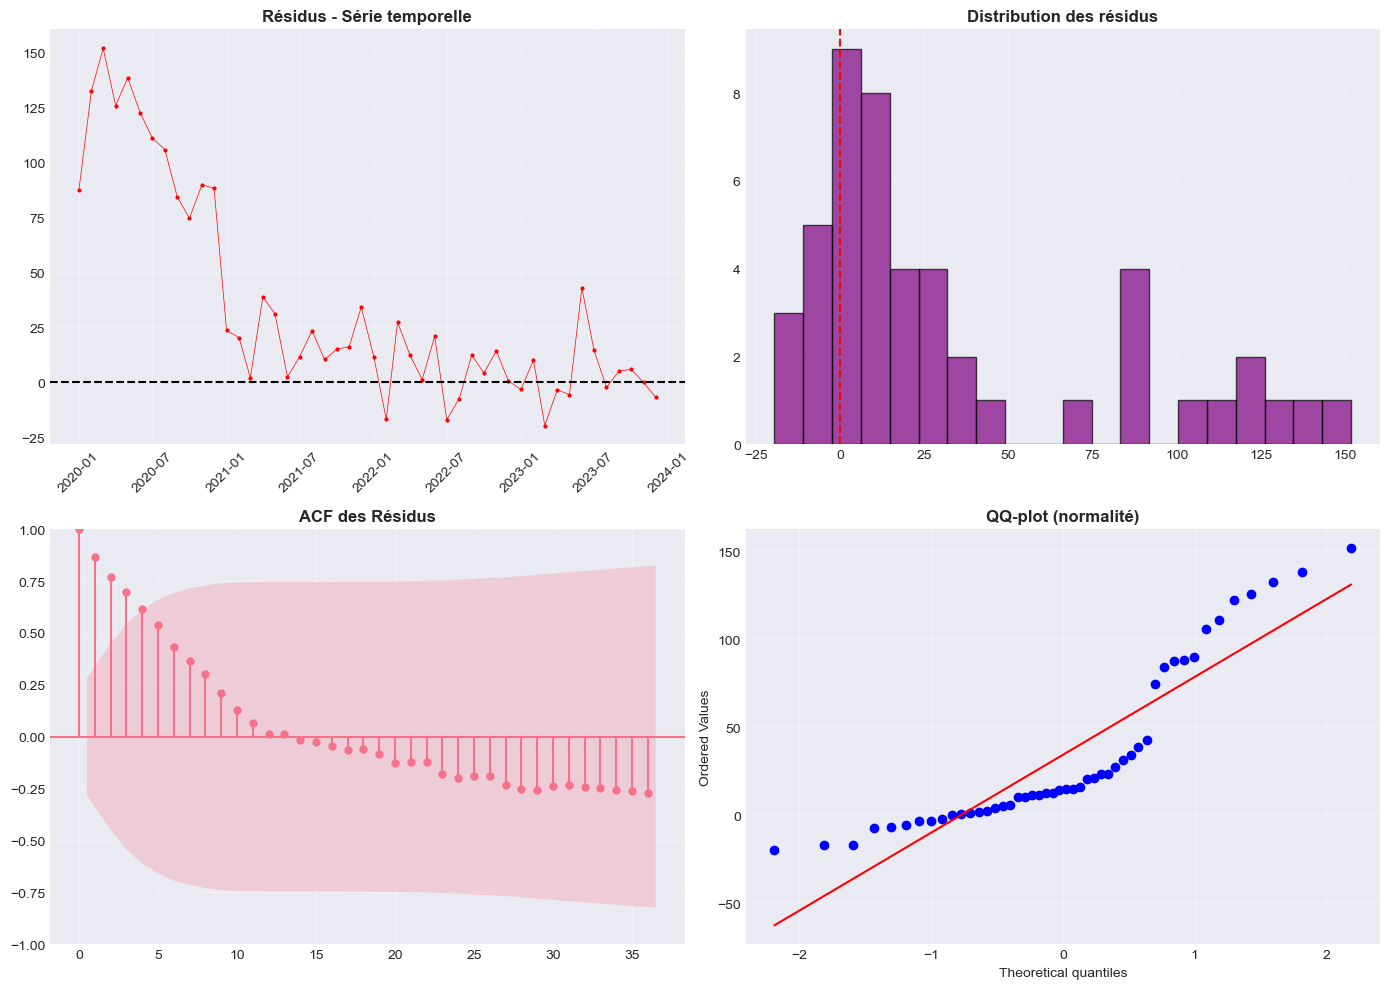

In [37]:
print("\n📈 ANALYSE COMPLÉMENTAIRE DES RÉSIDUS")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Graphique temporel des résidus
axes[0,0].plot(df.index, residus, color='red', marker='o', markersize=2, linewidth=0.5)
axes[0,0].axhline(y=0, color='black', linestyle='--')
axes[0,0].set_title('Résidus - Série temporelle', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Histogramme des résidus
axes[0,1].hist(residus_clean, bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[0,1].axvline(x=0, color='red', linestyle='--')
axes[0,1].set_title('Distribution des résidus', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# ACF des résidus
plot_acf(residus_clean, lags=36, ax=axes[1,0], alpha=0.05)
axes[1,0].set_title('ACF des Résidus', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# QQ-plot pour normalité
from scipy import stats
stats.probplot(residus_clean, dist="norm", plot=axes[1,1])
axes[1,1].set_title('QQ-plot (normalité)', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Face à ces résultats, plusieurs actions sont possibles:

**Option 1 - Réviser les ordres du modèle:**
   - Essayer SARIMA(1,1,1)(1,1,1)12 (avec d=1 au lieu de d=0)
   - Augmenter P ou Q (essayer (2,1,1) ou (1,1,2))
   - Tester SARIMA(2,1,2)(1,1,1)12

**Option 2 - Transformation de la série:**
   - Appliquer un logarithme pour stabiliser la variance
   - Utiliser une transformation Box-Cox

**Option 3 - Modèle plus complexe:**
   - Envisager un SARIMA avec plus de termes saisonniers
   - Tester (1,1,1)(2,1,1)12 ou (1,1,1)(1,1,2)12

**Option 4 - Vérifier les outliers:**
   - Identifier et traiter les valeurs aberrantes
   - Utiliser des modèles robustes aux outliers
""")



## 2.7 Prévisions sur les 12 prochaines périodes

PRÉVISIONS AVEC LE MODÈLE SARIMA

📊 TABLEAU DES PRÉVISIONS (12 PROCHAINS MOIS)
------------------------------------------------------------
      Date  Prévision
01/01/2024  87.915167
01/02/2024 114.050947
01/03/2024 125.552049
01/04/2024 136.087486
01/05/2024 128.320555
01/06/2024 119.591222
01/07/2024 106.057736
01/08/2024  83.842532
01/09/2024  78.090777
01/10/2024  78.790810
01/11/2024  92.289171
01/12/2024  91.801514


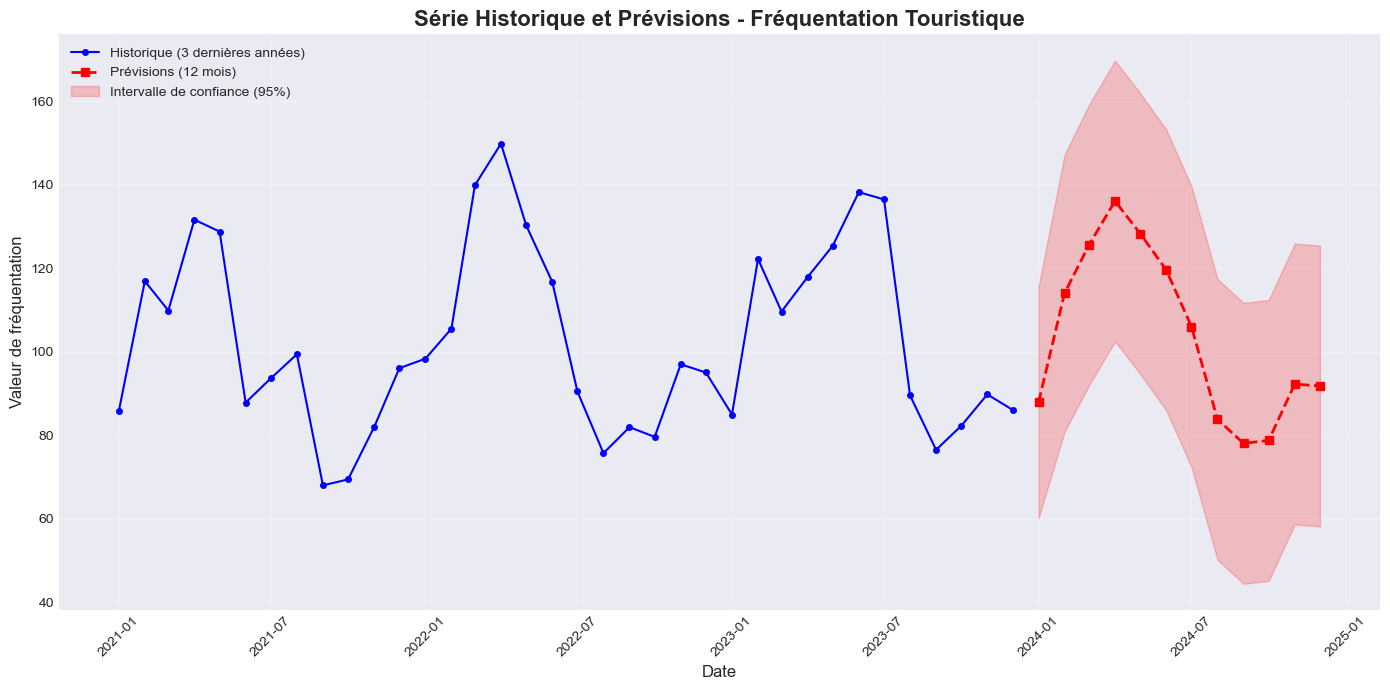

In [38]:
# a) Prévisions sur les 12 prochaines périodes
print("=" * 60)
print("PRÉVISIONS AVEC LE MODÈLE SARIMA")
print("=" * 60)

# Générer les prévisions
n_periods = 12
forecast = resultats_final.forecast(steps=n_periods)

# Créer les dates futures
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# b) Retransformation (si nécessaire - ici pas de transformation car d=0)
# Si on avait appliqué un log ou une différenciation, on retransformerait ici

# c) Tableau des 12 valeurs prévues
print("\n📊 TABLEAU DES PRÉVISIONS (12 PROCHAINS MOIS)")
print("-" * 60)

previsions_df = pd.DataFrame({
    'Date': future_dates,
    'Prévision': forecast.values
})
previsions_df['Date'] = previsions_df['Date'].dt.strftime('%d/%m/%Y')
print(previsions_df.to_string(index=False))

# d) Graphique série historique + prévisions
plt.figure(figsize=(14, 7))

# Série historique
plt.plot(df.index[-36:], df['Valeur'][-36:], 
         color='blue', marker='o', markersize=4, linewidth=1.5, 
         label='Historique (3 dernières années)')

# Prévisions
plt.plot(future_dates, forecast.values, 
         color='red', marker='s', markersize=6, linewidth=2, 
         label='Prévisions (12 mois)', linestyle='--')

# Intervalle de confiance (optionnel)
conf_int = resultats_final.get_forecast(steps=n_periods).conf_int(alpha=0.05)
plt.fill_between(future_dates, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='red', alpha=0.2, 
                 label='Intervalle de confiance (95%)')

plt.title('Série Historique et Prévisions - Fréquentation Touristique', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Valeur de fréquentation', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## dernier commentaires
Les prévisions pour les 12 prochains mois (à partir de {future_dates[0].strftime('%B %Y')}):

- **Valeur minimale prévue**: {forecast.min():.2f} (en {future_dates[forecast.argmin()].strftime('%B %Y')})
- **Valeur maximale prévue**: {forecast.max():.2f} (en {future_dates[forecast.argmax()].strftime('%B %Y')})
- **Moyenne des prévisions**: {forecast.mean():.2f}
- **Tendance**: {'Haussière' if forecast.iloc[-1] > forecast.iloc[0] else 'Baissière'}

**INTERPRÉTATION**:

1. **Saisonnalité maintenue**: Les prévisions reproduisent le cycle saisonnier observé
2. **Amplitude**: Les valeurs prévues restent dans la plage historique 
3. **Incertitude**: L'intervalle de confiance s'élargit avec l'horizon de prévision
4. **Contexte**: Ces prévisions supposent que la structure passée se reproduit

 **LIMITES**:

- Les prévisions sont basées sur un modèle non validé (test Ljung-Box rejeté)
- À prendre avec précaution - des révisions de modèle sont nécessaires
- Facteurs exogènes non pris en compte (crises, événements, tendances économiques)

